<a href="https://colab.research.google.com/github/Nusnan-AM/Final_waterQualty_Models/blob/main/Final_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
'augment_data1 (1).csv'
 augment_data1.csv
 catboost_info
'Colab Notebooks'
 Colour_Final.csv
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of augment_data1.csv'
'Copy of randomforest (1).ipynb'
'Copy of randomforest.ipynb'
'CRM Backend.gsheet'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
 data.csv
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_011

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data_PH = pd.read_csv("Final_ph.csv")
data_EC = pd.read_csv("Final_ec.csv")
data_Turbidity = pd.read_csv("Final_turbidity.csv")
data_Colour = pd.read_csv("Final_colour.csv")
data_TDS = pd.read_csv("Final_tds.csv")

In [ ]:
data_PH.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,1/1/2019,500.0,74.7,118.4,64.60,7.32,7.08,7.03,7.06,7.09,...,6.98,6.93,6.83,6.78,2.5,0.52,0.65,20000,4160,5200
1,1/2/2019,484.0,46.7,123.8,67.87,8.51,8.84,8.25,8.37,8.54,...,7.72,7.74,7.71,7.74,0.5,0.20,0.20,4000,1600,1600
2,1/3/2019,326.0,42.1,169.5,78.30,7.43,7.67,7.55,7.43,7.42,...,7.65,7.60,7.54,7.61,4.0,0.65,0.30,32000,5200,2400
3,1/7/2019,454.0,43.4,124.5,68.10,7.16,7.04,7.11,7.05,7.10,...,6.91,6.88,6.89,6.72,1.0,0.18,0.20,8000,1440,1600
4,1/8/2019,307.0,38.3,118.4,86.32,7.09,6.91,6.88,6.86,6.84,...,6.86,6.85,6.84,6.96,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_EC.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,148.1,137.2,144.1,130.1,...,148.4,149.3,156.5,150.0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,180.6,160.4,169.5,160.7,...,155.0,157.3,168.4,165.2,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,180.3,182.3,180.1,180.2,...,166.3,166.3,163.6,164.5,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,145.2,142.1,141.4,141.3,...,141.6,141.4,148.7,144.7,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,130.3,128.4,126.1,127.3,...,145.8,152.9,152.7,148.8,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Turbidity.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,27.2,16.3,74.9,36.0,...,0.61,0.63,0.32,0.84,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,45.7,28.3,14.9,15.7,...,0.40,0.60,0.31,0.42,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,33,31.2,32.6,41.5,...,0.76,0.65,0.78,1.56,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,18.2,16.2,7.15,30.8,...,0.13,0.41,0.92,0.71,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,38,20.6,26.9,25.8,...,0.97,1.00,0.42,0.58,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Colour.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,420.0,155.0,500.0,500.0,...,0.0,2.0,0,0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,409.0,285.0,185.0,158.0,...,0.0,0.0,0,0,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,101.0,90.0,85.0,72.0,...,2.0,3.0,9,10,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,21.0,46.0,64.0,39.0,...,4.0,10.0,8,10,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,124.0,249.0,153.0,210.0,...,0.0,0.0,11,13,3.0,0.15,0.30,24000,1200,2400


In [ ]:
X_ph = data_PH[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ph = data_PH['clear_well']
X_ec = data_EC[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ec = data_EC['clear_well']
X_turbidity = data_Turbidity[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_turbidity = data_Turbidity['clear_well']
X_colour = data_Colour[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_colour = data_Colour['clear_well']
X_tds = data_TDS[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_tds = data_TDS['clear_well']

# TDS

In [ ]:
X_tds_train, X_tds_test, y_tds_train, y_tds_test = train_test_split(X_tds, y_tds, test_size=0.2, random_state=42)

In [ ]:
model_tds=  RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_tds.fit(X_tds_train, y_tds_train)

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=42)

In [ ]:
y_tds_pred = model_tds.predict(X_tds_test)
y_tds_pred

array([118.3024 , 117.1439 , 129.3425 , 116.8134 , 235.0252 , 122.9853 ,
       118.1935 , 115.2707 , 129.2178 , 119.4404 , 110.26254, 121.8814 ,
       122.4715 , 120.0914 , 117.2825 , 117.9843 , 117.3073 , 118.8141 ,
       119.     , 107.7988 , 108.4922 , 117.5823 , 121.9943 , 101.4304 ,
        89.6883 , 115.634  , 111.6379 , 130.6537 , 128.582  ,  83.4451 ,
       105.1928 , 136.6206 , 121.5017 , 121.7591 , 127.8889 , 108.7665 ,
       124.8967 , 122.7255 , 115.3253 , 124.7458 , 136.3052 , 112.9108 ,
       119.4302 , 121.58233, 117.1127 , 123.1553 , 112.9449 , 118.9916 ,
       116.6461 ,  85.7936 , 114.2439 , 130.3204 , 118.5843 , 118.7851 ,
       124.3107 , 113.7691 , 128.2716 , 102.3645 , 122.5315 , 132.2132 ,
       125.4312 , 104.7816 , 128.0116 , 126.7542 , 106.2584 , 106.4452 ,
       118.30966, 136.7262 , 107.0355 ,  92.9272 , 122.9765 ,  93.5532 ,
       126.7458 , 109.3474 , 113.6085 , 124.2932 , 127.7876 , 115.1167 ,
        91.0393 , 113.5517 , 121.3755 , 120.3796 , 

In [ ]:
results_TDS = pd.DataFrame({
    'Actual': y_tds_test.flatten() if hasattr(y_tds_test, 'flatten') else y_tds_test,
    'Predicted': y_tds_pred.flatten() if hasattr(y_tds_pred, 'flatten') else y_tds_pred
})


results_TDS

,Actual,Predicted
428,131.80,118.3024
930,89.78,117.1439
781,149.70,129.3425
451,63.06,116.8134
429,138.90,235.0252
...,...,...
755,138.00,99.2997
526,101.80,113.9454
243,72.62,112.8603
358,124.90,118.5497


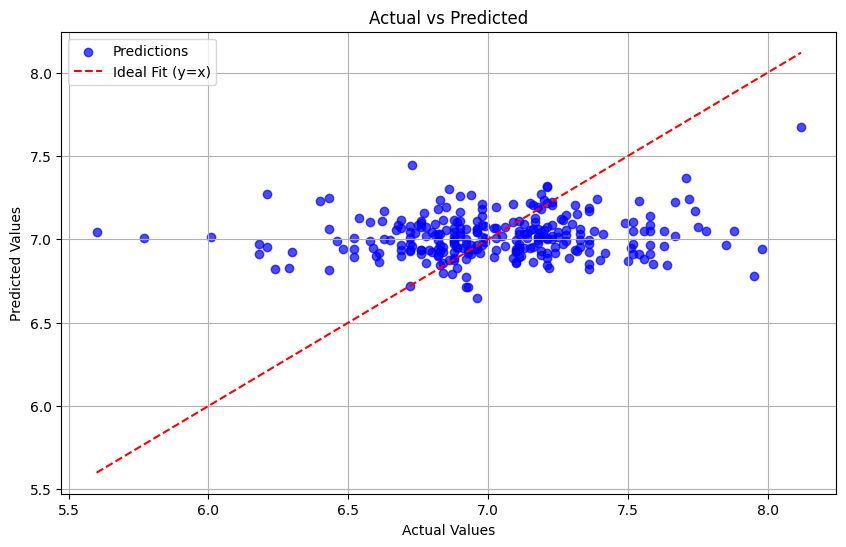

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_PH['Actual'], results_PH['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_PH['Actual'].min(), results_PH['Predicted'].min())
max_val = max(results_PH['Actual'].max(), results_PH['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# PH

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph=  RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_ph.fit(X_ph_train, y_ph_train)

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=42)

In [ ]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([7.032 , 6.9471, 7.1032, 6.8637, 7.0106, 7.0421, 7.0204, 6.9456,
       6.951 , 6.9975, 6.8915, 6.9216, 6.8748, 7.103 , 7.1415, 6.8778,
       7.0748, 6.8591, 6.9261, 7.0112, 6.9273, 6.9502, 7.2247, 7.0832,
       7.2742, 7.168 , 6.9414, 7.0584, 6.8301, 7.049 , 6.9681, 6.915 ,
       6.9408, 6.9167, 7.0117, 6.9442, 7.0245, 6.8558, 7.0499, 6.857 ,
       7.0663, 6.9937, 7.0579, 6.9518, 7.0019, 7.063 , 7.2388, 7.2247,
       7.0012, 7.0433, 6.9315, 7.1637, 7.0162, 6.9286, 6.9557, 6.8648,
       6.9098, 7.0723, 7.0772, 7.0205, 7.2321, 7.1124, 6.8479, 6.8665,
       7.1861, 6.9444, 7.0605, 7.1273, 7.0335, 7.3052, 6.939 , 7.0734,
       6.9979, 7.1107, 6.8199, 6.9967, 6.9612, 7.0532, 7.0321, 6.9453,
       6.9613, 6.9482, 7.3175, 7.1611, 7.0818, 6.9341, 6.9953, 7.0622,
       7.0621, 6.9728, 7.0699, 7.0291, 6.8467, 7.0452, 7.1803, 7.1692,
       7.0493, 7.1138, 6.9787, 7.2188, 6.9924, 7.0033, 7.008 , 7.0763,
       7.2499, 7.0563, 7.1086, 6.9207, 7.2065, 7.1297, 7.1416, 7.1006,
      

In [ ]:
results_PH = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})


results_PH

,Actual,Predicted
428,7.33,7.0320
930,7.51,6.9471
781,6.58,7.1032
451,7.16,6.8637
429,6.72,7.0106
...,...,...
755,7.27,6.9745
526,7.11,7.0321
243,6.88,7.0441
358,6.84,6.8006


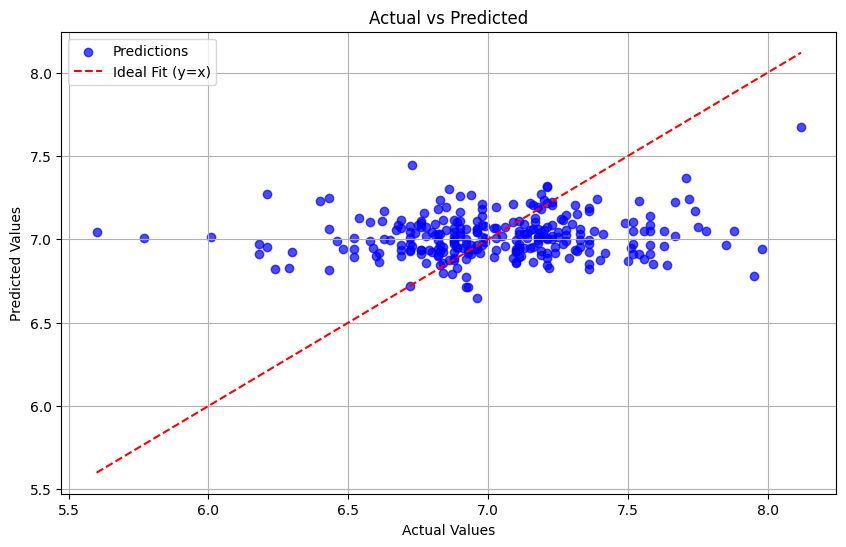

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_PH['Actual'], results_PH['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_PH['Actual'].min(), results_PH['Predicted'].min())
max_val = max(results_PH['Actual'].max(), results_PH['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# EC

In [ ]:
X_ec_train, X_ec_test, y_ec_train, y_ec_test = train_test_split(X_ec, y_ec, test_size=0.2, random_state=42)

In [ ]:
model_ec =  RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_ec.fit(X_ec_train, y_ec_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

In [ ]:
y_ec_pred = model_ec.predict(X_ec_test)
y_ec_pred

array([192.5968    , 210.239     , 207.21933333, 223.55966667,
       181.196     , 204.17933333, 225.65833333, 198.262     ,
       215.81466667, 203.08246667, 209.50266667, 148.51366667,
       201.42933333, 184.59733333, 196.83623333, 196.02733333,
       201.2       , 188.663     , 186.38466667, 177.51946667,
       187.33733333, 193.224     , 214.20566667, 175.703     ,
       205.56833333, 223.15566667, 205.0309    , 176.537     ,
       166.56833333, 144.8658    , 186.74833333, 208.80366667,
       167.66206667, 206.69833333, 211.07633333, 211.54433333,
       156.16233333, 182.992     , 202.37166667, 194.21833333,
       214.98023333, 134.60833333, 211.63303333, 198.53533333,
       185.821     , 209.7108    , 157.13666667, 193.92533333,
       216.687     , 185.83066667, 207.45866667, 199.464     ,
       185.04566667, 203.18546667, 167.2038    , 209.452     ,
       171.64766667, 204.865     , 218.96166667, 179.971     ,
       193.37133333, 220.30933333, 204.86013333, 189.01

In [ ]:
results_EC = pd.DataFrame({
    'Actual': y_ec_test.flatten() if hasattr(y_ec_test, 'flatten') else y_ec_test,
    'Predicted': y_ec_pred.flatten() if hasattr(y_ec_pred, 'flatten') else y_ec_pred
})


results_EC

,Actual,Predicted
49,180.7,192.596800
1096,195.9,210.239000
494,188.9,207.219333
1110,260.8,223.559667
922,187.7,181.196000
...,...,...
1008,154.7,157.601333
1039,147.6,148.032000
1285,176.8,154.833333
1256,188.6,198.059667


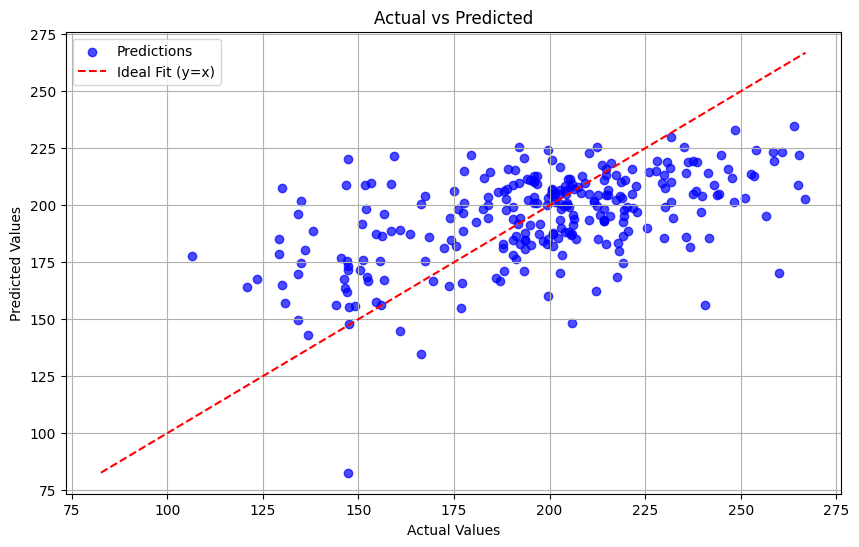

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_EC['Actual'], results_EC['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_EC['Actual'].min(), results_EC['Predicted'].min())
max_val = max(results_EC['Actual'].max(), results_EC['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# Turbidity

In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity =  RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([1.04876667, 0.9424    , 1.51893333, 1.01803333, 5.78276667,
       3.96586667, 1.61363333, 0.9253    , 2.20123333, 1.05973333,
       2.17596667, 1.72043333, 1.05493333, 0.9194    , 2.5496    ,
       1.3936    , 1.23706667, 1.3077    , 0.82376667, 0.90413333,
       0.97253333, 2.2232    , 1.16816667, 1.73163333, 1.1366    ,
       1.7909    , 1.3585    , 0.92786667, 3.8626    , 1.65146667,
       1.2167    , 1.95753333, 1.82476667, 1.3452    , 0.89846667,
       1.06866667, 1.69656667, 1.18733333, 3.85816667, 0.8353    ,
       0.92996667, 1.0418    , 0.91023333, 1.45863333, 1.09153333,
       1.22633333, 1.0842    , 1.4358    , 2.0207    , 2.5994    ,
       1.97866667, 4.78203333, 0.93533333, 1.10106667, 3.27786667,
       2.2473    , 0.8931    , 1.67166667, 2.34973333, 2.06253333,
       2.1031    , 1.3053    , 1.4421    , 2.58656667, 1.58926667,
       1.73676667, 1.10993333, 0.9408    , 1.45086667, 0.99113333,
       1.4459    , 1.12386667, 1.36793333, 1.18083333, 1.14836

In [ ]:
results_TURBIDITY = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})

results_TURBIDITY

,Actual,Predicted
51,0.89,1.048767
1102,0.32,0.942400
1314,15.50,1.518933
514,1.82,1.018033
1252,0.56,5.782767
...,...,...
573,0.92,0.945867
243,1.26,1.166667
947,1.60,0.791833
638,1.72,1.123600


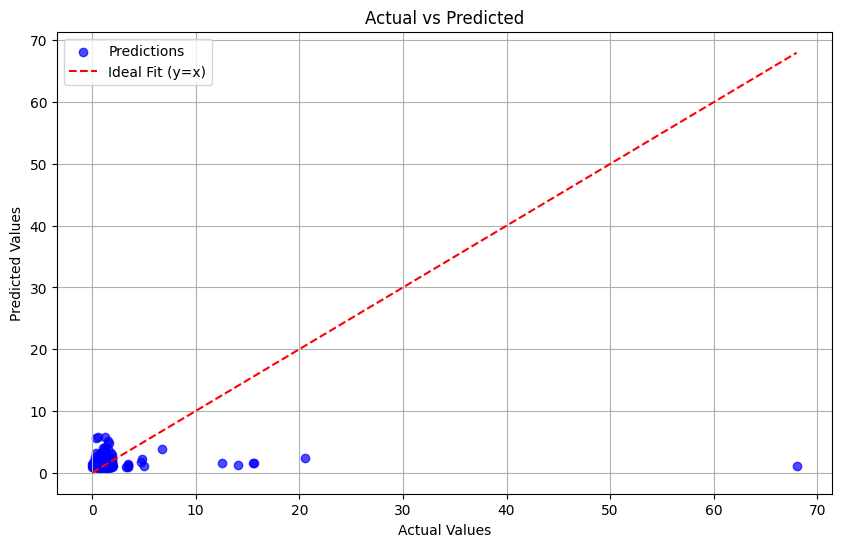

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_TURBIDITY['Actual'], results_TURBIDITY['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_TURBIDITY['Actual'].min(), results_TURBIDITY['Predicted'].min())
max_val = max(results_TURBIDITY['Actual'].max(), results_TURBIDITY['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


# Colour

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour =  RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_colour.fit(X_colour_train, y_colour_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

In [ ]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([ 8.26333333,  8.88666667,  7.66333333, 10.86      ,  8.66      ,
        7.47333333,  7.18333333, 10.26      ,  7.71      , 11.72666667,
        8.92333333, 11.59333333, 13.81333333, 41.37      , 11.19666667,
        5.79333333,  9.88333333,  9.80333333, 11.25666667, 12.46333333,
       13.04333333, 11.74666667,  8.36      , 13.84666667, 14.71333333,
        8.94666667, 10.97666667, 12.32666667, 10.05666667,  8.89666667,
       10.72666667,  8.85      ,  7.97666667, 10.73333333,  8.06666667,
        9.38666667,  8.24666667, 14.28      , 10.91666667, 12.37      ,
        9.45333333, 10.        ,  8.37      , 13.31666667,  9.57666667,
       33.94      , 11.38333333, 12.27333333,  6.39      , 11.30666667,
       11.96      , 17.50666667,  9.34666667, 10.10666667, 13.97      ,
        9.08      , 11.37666667, 11.38666667,  5.97666667, 11.21      ,
        8.74333333,  9.84      , 12.26666667, 10.70666667, 16.79      ,
        8.06333333,  9.46666667,  9.78333333,  8.12666667,  7.36

In [ ]:
results_COLOUR = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})


results_COLOUR

,Actual,Predicted
428,10,8.263333
930,8,8.886667
781,10,7.663333
451,0,10.860000
429,11,8.660000
...,...,...
755,6,7.596667
526,14,10.680000
243,11,12.953333
358,10,13.166667


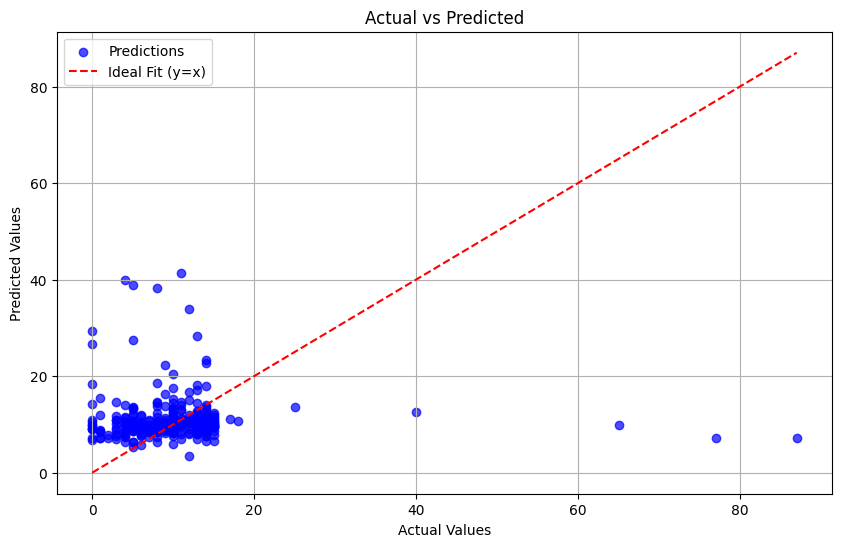

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_COLOUR['Actual'], results_COLOUR['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_COLOUR['Actual'].min(), results_COLOUR['Predicted'].min())
max_val = max(results_COLOUR['Actual'].max(), results_COLOUR['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ec_test, y_ec_pred, "EC")
evaluate_model(y_tds_test, y_tds_pred, "TDS")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")


Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 1.26
Mean Squared Error (MSE): 21.39
R-squared (R²): -0.03

Evaluation Metrics for EC:
Mean Absolute Error (MAE): 21.97
Mean Squared Error (MSE): 784.12
R-squared (R²): 0.26

Evaluation Metrics for TDS:
Mean Absolute Error (MAE): 22.40
Mean Squared Error (MSE): 7467.81
R-squared (R²): -0.02

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 0.14
R-squared (R²): -0.04

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 5.56
Mean Squared Error (MSE): 104.81
R-squared (R²): -0.44
